# Logistic Regression - Implementation

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [14]:
X, y = make_classification(
    n_samples=2000, # 1000 observations
    n_informative = 2,
    n_features=4, # 5 total features
    n_classes=2, # binary target/label 
    random_state=0 # if you want reproducible dataset
)

In [15]:
X.shape, y.shape

((2000, 4), (2000,))

In [16]:
print(y)

[1 0 1 ... 0 0 0]


In [17]:
def scatter_plot(X,y, hue = True):
    if hue:
        plt.scatter(X[:, 0], X[:, 1], c=y)
    else:
        plt.scatter(X[:, 0], X[:, 1])
    plt.show()

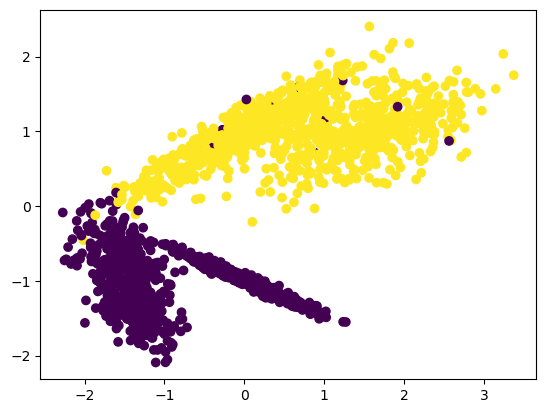

In [18]:
scatter_plot(X[:,:2], y)

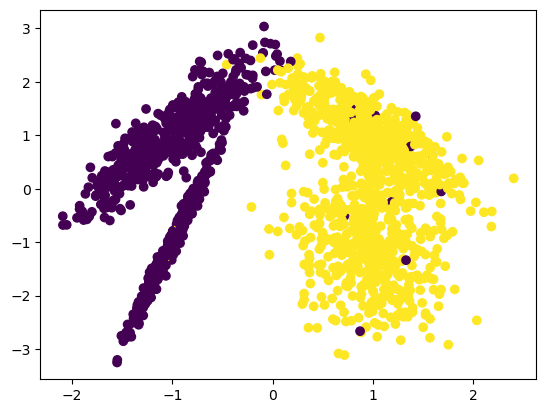

In [19]:
scatter_plot(X[:,1:3], y)

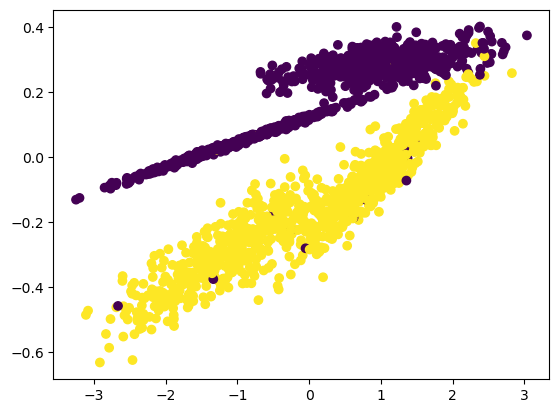

In [20]:
scatter_plot(X[:,2:4], y)

In [21]:
def normalize(X):
    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    
    return (X-mean)/std

In [22]:
X = normalize(X)

In [23]:
pd.DataFrame(X).head()

,0,1,2,3
0,-0.175564,0.619498,0.732813,0.005447
1,-1.456143,-1.336074,0.737719,1.534021
2,0.279799,1.233741,0.664139,-0.519441
3,0.288951,1.175322,0.604388,-0.513718
4,1.369073,0.910340,-0.978877,-1.362763


In [38]:
n_features = X.shape[1]
n_features

4

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
X_train.shape, y_train.shape

((1400, 4), (1400,))

In [27]:
X_test.shape, y_test.shape

((600, 4), (600,))

In [ ]:
# Logistic Regression Model

In [28]:
def sigmoid(z):
    func = 1/(1+np.exp(-z))
    return func

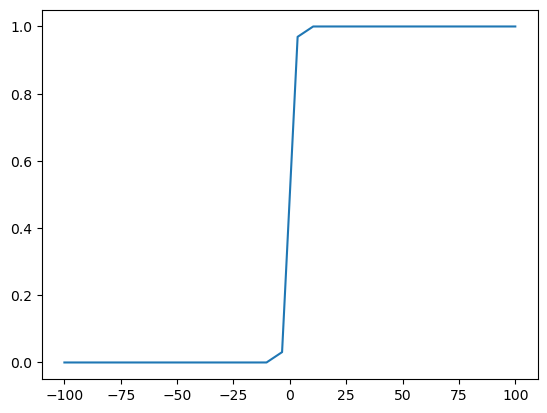

In [32]:
vals = np.linspace(-100,100, 30)
plt.plot(vals, sigmoid(vals))
plt.show()

In [41]:
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

In [34]:
def loss_binary_cross_entropy(y, y_pred):
    loss = -1*np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return loss

In [50]:
def gradient(X,y, y_pred):
    m = X.shape[0]
    grad = (-1/m)*np.dot(X.T, (y-y_pred))
    return grad

In [55]:
def preprocess_data(X):
    if X.shape[1] == n_features:
        rows = X.shape[0]
        X = np.hstack((np.ones((rows,1)), X))
    return X

In [68]:
def training(X,y, learning_rate = 0.1, max_iter = 200):
    
    X = preprocess_training_data(X)
    n_features = X.shape[1]
    # randomly initialize theta
    theta = np.random.randn(n_features+1,1)
    error_list = []
    print(f"X shape: {X.shape}\nTheta shape: {theta.shape}")
    
    for i in range(max_iter):
        print(f"================ Iter {i} ================")
        y_pred = hypothesis(X,theta)
        
        error = loss_binary_cross_entropy(y,y_pred)
        error_list.append(error)
        
        grad = gradient(X,y,y_pred)
        theta = theta - learning_rate*grad
    
    plt.plot(error_list)
    plt.show()
    return theta

In [70]:
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

In [71]:
X_train.shape, X_test.shape

((1400, 5), (600, 5))

In [61]:
y_train.shape, y_test.shape

((1400,), (600,))

In [63]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [64]:
y_train.shape, y_test.shape

((1400, 1), (600, 1))

In [69]:
theta = training(X_train,y_train)

X shape: (1400, 6)
Theta shape: (7, 1)
================ Iter 0 ================


ValueError: shapes (1400,6) and (7,1) not aligned: 6 (dim 1) != 7 (dim 0)